In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.utils import plot_model

In [2]:
image_path = "WIDER FACE/couple_folder/images"
annot_path = "WIDER FACE/couple_folder/annots"

0.jpg
(0, temp    278 178 542 554
Name: 0, dtype: object)
(1, temp    548 262 784 610
Name: 1, dtype: object)


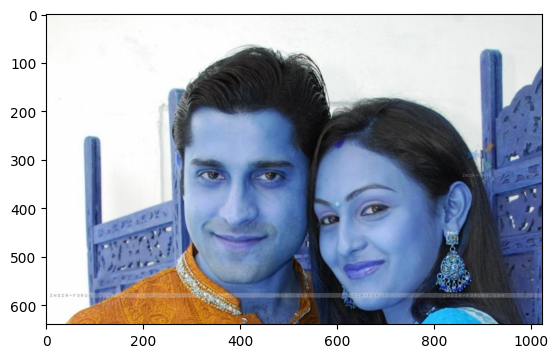

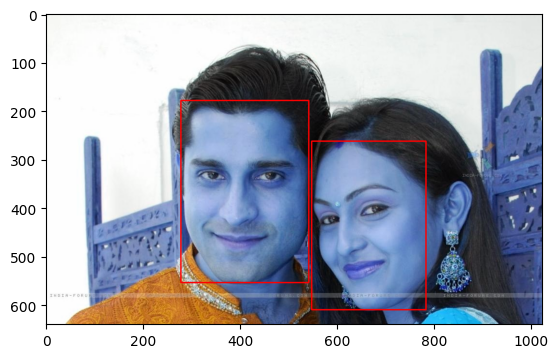

In [3]:
for e,i in enumerate(os.listdir(annot_path)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(image_path,filename))
        df = pd.read_csv(os.path.join(annot_path,i), sep='\t', names=['temp'])
        plt.imshow(img)
        for row in df.iterrows():
            print(row)
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [4]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

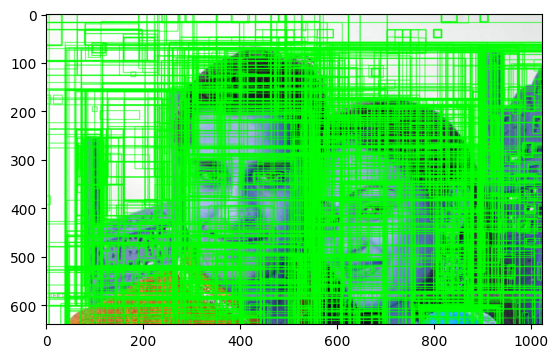

In [5]:
im = cv2.imread(os.path.join(image_path,"0.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [6]:
train_images=[]
train_labels=[]

In [7]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [8]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [9]:
for e,i in enumerate(os.listdir(annot_path)):
    try:
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(image_path,filename))
            df = pd.read_csv(os.path.join(annot_path,i), sep='\t', names=['temp'])
            gtvalues=[] 
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2}) # appending groundtruth values
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 0.jpg
1 1.jpg
2 10.jpg
3 100.jpg
4 101.jpg
5 102.jpg
6 103.jpg
7 104.jpg
8 105.jpg
9 106.jpg
inside
10 107.jpg
11 108.jpg
12 109.jpg
13 11.jpg
14 110.jpg
15 111.jpg
16 112.jpg
17 113.jpg
18 114.jpg
19 115.jpg
20 116.jpg
21 117.jpg
22 118.jpg
23 119.jpg
24 12.jpg
25 120.jpg
26 121.jpg
27 122.jpg
28 123.jpg
29 124.jpg
30 125.jpg
31 126.jpg
32 127.jpg
33 129.jpg
34 13.jpg
35 130.jpg
36 131.jpg
37 132.jpg
38 133.jpg
39 134.jpg
40 135.jpg
41 136.jpg
42 137.jpg
43 138.jpg
44 139.jpg
45 14.jpg
46 140.jpg
47 141.jpg
48 142.jpg
49 143.jpg
50 15.jpg
51 16.jpg
52 17.jpg
53 18.jpg
54 19.jpg
55 2.jpg
56 20.jpg
57 21.jpg
58 22.jpg
59 23.jpg
60 24.jpg
61 25.jpg
62 26.jpg
63 27.jpg
64 28.jpg
65 29.jpg
66 3.jpg
67 30.jpg
68 31.jpg
69 32.jpg
70 33.jpg
71 34.jpg
72 35.jpg
73 36.jpg
74 37.jpg
75 38.jpg
76 39.jpg
77 4.jpg
78 40.jpg
79 41.jpg
80 42.jpg
81 43.jpg
82 44.jpg
83 45.jpg
84 46.jpg
85 47.jpg
86 48.jpg
87 49.jpg
88 5.jpg
89 50.jpg
90 51.jpg
91 52.jpg
92 53.jpg
93 54.jpg
94 55.jpg
95 56.jpg
96 57.

In [10]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [11]:
X_new.shape

(4652, 224, 224, 3)

In [12]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [14]:
vggmodel.layers[-2]

In [15]:
X = vggmodel.layers[-2].output

In [16]:
predictions = Dense(2, activation="softmax")(X)

In [17]:
model_final = Model(inputs = vggmodel.input, 
                    outputs = predictions)

In [18]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [19]:
model_final.compile(loss = keras.losses.categorical_crossentropy, 
                    optimizer = opt, 
                    metrics=["accuracy"])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [21]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [22]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [23]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [24]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4186, 224, 224, 3) (466, 224, 224, 3) (4186, 2) (466, 2)


In [25]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90, dtype='uint8')
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90, dtype='uint8')
testdata = tsdata.flow(x=X_test, y=y_test)

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [27]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [28]:
hist = model_final.fit(x= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 0.6196 - accuracy: 0.9000
Epoch 1: val_loss improved from inf to 0.19343, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 16s 566ms/step - loss: 0.6196 - accuracy: 0.9000 - val_loss: 0.1934 - val_accuracy: 0.9688
Epoch 2/1000
10/10 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.9594
Epoch 2: val_loss improved from 0.19343 to 0.07743, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 5s 518ms/step - loss: 0.2859 - accuracy: 0.9594 - val_loss: 0.0774 - val_accuracy: 0.9688
Epoch 3/1000
10/10 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9688
Epoch 3: val_loss improved from 0.07743 to 0.06933, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 5s 521ms/step - loss: 0.1392 - accuracy: 0.9688 - val_loss: 0.0693 - val_accuracy: 0.9531
Epoch 4/1000
10/10 [==============================] - ETA:

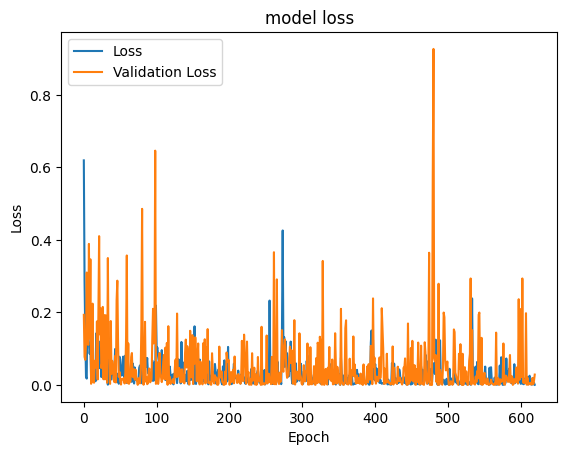

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

1/1 [==============================] - 1s 1s/step
not face


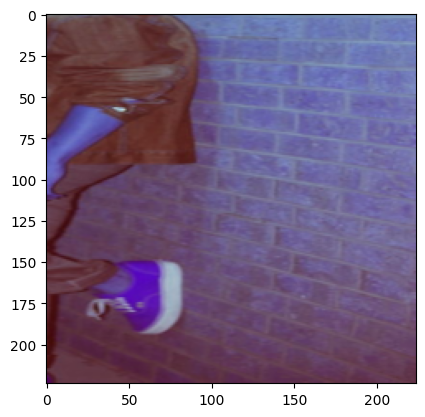

In [30]:
im = X_test[15]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("face")
else:
    print("not face")

1/1 [==============================] - 0s 22ms/step


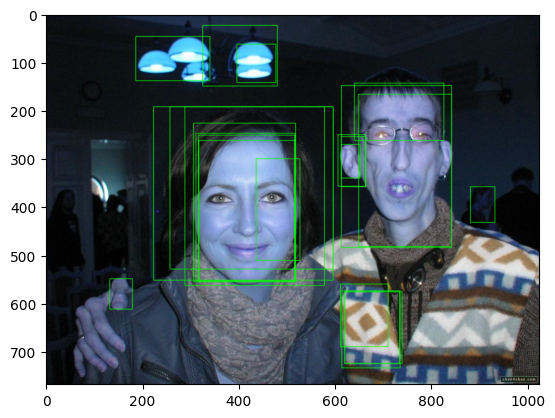

In [31]:
z=0
for e,i in enumerate(os.listdir(image_path)):
    if i.startswith("140"):
        z += 1
        img = cv2.imread(os.path.join(image_path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)
        break